In [7]:
################################## A1 ###################################

def split(values, first, last, count):
        pivotItem = values[first]
        j = first
        for i in range(first+1, last+1):
            if values[i] < pivotItem:
                count[0] += 1   # 데이터 비교 횟수 카운트
                j += 1
                values[i], values[j] = values[j], values[i] # swap
        pivotPoint = j
        values[first], values[pivotPoint] = values[pivotPoint], values[first]   # swap
        return pivotPoint

def _quick_sort(values, first, last, count):
    if first < last:
        pivotPoint = split(values, first, last, count)
        _quick_sort(values, first, pivotPoint-1, count)
        _quick_sort(values, pivotPoint+1, last, count)

def quick_sort(values):
    first = 0
    last = len(values)-1
    count = [0]     # 데이터 비교 횟수(if (s[i]<pivotItem), call by reference를 위해 list에 값을 넣었음
    _quick_sort(values, first, last, count)

    return count[0]

In [11]:
import numpy as np
from random import randrange

################################## quick sort test ###################################
print('################################## quick sort test ###################################')
n = 100
X = [randrange(0, n+1) for i in range(n)]
print(len(X))
print(X)
cnt = quick_sort(X)
print(X)
print(cnt)  # 비교횟수

################################## quick sort test ###################################
100
[12, 70, 88, 96, 35, 87, 76, 12, 89, 46, 93, 26, 99, 70, 39, 28, 54, 53, 43, 73, 57, 12, 89, 12, 94, 24, 45, 74, 60, 38, 22, 6, 74, 80, 87, 2, 9, 53, 5, 1, 6, 5, 15, 71, 80, 100, 91, 79, 56, 66, 6, 81, 59, 30, 78, 56, 38, 70, 42, 22, 17, 29, 96, 46, 47, 18, 57, 48, 15, 93, 18, 100, 98, 56, 92, 84, 83, 30, 81, 8, 47, 98, 61, 80, 86, 89, 99, 92, 10, 71, 56, 24, 63, 24, 76, 82, 49, 33, 18, 65]
[1, 2, 5, 5, 6, 6, 6, 8, 9, 10, 12, 12, 12, 12, 15, 15, 17, 18, 18, 18, 22, 22, 24, 24, 24, 26, 28, 29, 30, 30, 33, 35, 38, 38, 39, 42, 43, 45, 46, 46, 47, 47, 48, 49, 53, 53, 54, 56, 56, 56, 56, 57, 57, 59, 60, 61, 63, 65, 66, 70, 70, 70, 71, 71, 73, 74, 74, 76, 76, 78, 79, 80, 80, 80, 81, 81, 82, 83, 84, 86, 87, 87, 88, 89, 89, 89, 91, 92, 92, 93, 93, 94, 96, 96, 98, 98, 99, 99, 100, 100]
230


################################## A1 ###################################
[306.28, 736.91, 1236.7, 1762.58]


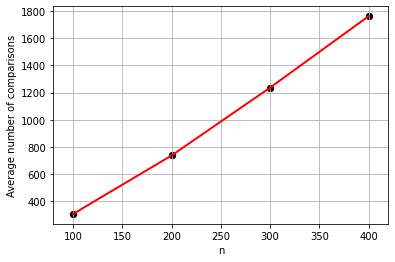

In [29]:
import matplotlib.pyplot as plt
# Colab에서 바로 그래프를 볼 수 있도록 함
%matplotlib inline

print('################################## A1 ###################################')

N = [100*i for i in range(1,5)]
iter = 100
AVG_CNT = []    # n값에 따른 평균 비교횟수

for n in N:
    avg_cnt = 0
    for i in range(iter):   # 데이터 100 set 생성
        X = [randrange(0, n+1) for j in range(n)]   # 0부터 n까지의 수 중에서 n개를 중복을 허락하여 뽑겠다
        cnt = quick_sort(X)
        avg_cnt += cnt

    avg_cnt /= iter
    AVG_CNT.append(avg_cnt)

print(AVG_CNT)
plt.xlim(N[0]-20, N[-1]+20) # plot할 x의 범위
#plt.ylim(200, 400)          # plot할 y의 범위
plt.plot(N, AVG_CNT, linewidth=2, c='r')    # n과 평균 비교횟수를 잇는 선
plt.scatter(N, AVG_CNT, s=40, c='k')    # 평균 비교횟수를 좌표위에 나타냄
plt.xlabel("n")
plt.ylabel("Average number of comparisons")
plt.grid(True)

plt.show()

In [28]:
#### 보고서의 답변에서 사용한 코드

# nlog = []   # nlog2(n)값 저장
# for n in N: # N = [100, 200, 300, 400]
#     nlog.append(n*np.log2(n))

# print(nlog)
# print(AVG_CNT)
# print()

# for i in range(1, len(N)):   # 증가율 비교
#     print(AVG_CNT[i] / AVG_CNT[i-1], nlog[i]/nlog[i-1])

[664.3856189774724, 1528.7712379549448, 2468.6456071487646, 3457.54247590989, 4482.892142331044, 5537.291214297529, 6615.84777828263, 7715.08495181978, 8832.403072095334, 9965.784284662088, 11113.616589253224, 12274.582428595058, 13447.584680290562, 14631.69555656526]
[296.47, 720.57, 1242.16, 1746.79, 2294.42, 2855.55, 3410.43, 4059.71, 4618.82, 5357.78, 5871.36, 6571.43, 7320.2, 7725.3]

2.4304988700374404 2.3010299956639813
1.723857501700043 1.6147907194088114
1.4062520126231723 1.4005827591848152
1.313506489045621 1.2965544671006022
1.244562896069595 1.235205094945294
1.19431633135473 1.194780538397587
1.1903806851335463 1.1661521259823324
1.1377216599215214 1.1448225297910697
1.159988914917663 1.1283208208814093
1.0958568660900596 1.115177317891349
1.1192347258556792 1.104463369778698
1.1139432360992965 1.0955635157871326
1.0553400180322943 1.088053795861958


In [ ]:
################################## A2 ###################################

def prod2(u, v, threshold=2):
    n = max(len(str(u)), len(str(v)))   # 자릿수 계산을 위해 u, v를 문자로 변환하여 길이 계산

    if (u == 0 or v == 0):      return 0
    elif n <= threshold:        return u * v
    else:
        m = int(n/2)    # n/2의 마루함수값
        x, y = int(u / (10**m)), u % (10**m)    # n/2자리씩 분리
        w, z = int(v / (10**m)), v % (10**m)    # n/2자리씩 분리

        # 개선된 큰 수의 곱셈 알고리즘 (곱셈횟수 4번 -> 3번)
        r = prod2(x+y, w+z)
        p = prod2(x, w)
        q = prod2(y, z)

        return p*pow(10, 2*m) + (r-p-q)*pow(10, m) + q

In [ ]:
########################## prod2 test ####################################
print('########################## prod2 test ####################################')
a = randrange(10000, 999999)
b = randrange(10000, 999999)
print(a, b)
print(prod2(a,b))   # 큰 수의 곱셈
print(a*b)          # 일반적인 곱셈

135913 27734
3769411142
3769411142
